##### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../input/fraud-detection/fraudTrain.csv')
test = pd.read_csv('../input/fraud-detection/fraudTest.csv')

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
train.shape, test.shape

((1296675, 23), (555719, 23))

##### Data Cleaning

In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Converting data time columns to datetime datatype using pandas

In [8]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

Dropping the unnamed column as it doesn't serve anything

In [9]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


#### EDA and Feature Engineering

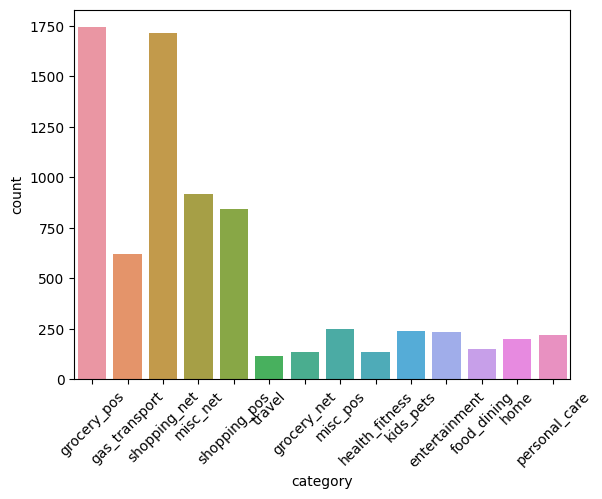

In [20]:
fraud_trans = train[train['is_fraud'] == 1]
sns.countplot(fraud_trans, x='category')
plt.xticks(rotation=45)
plt.show()

##### Most of fraud transactions occured during buying grocery and shopping

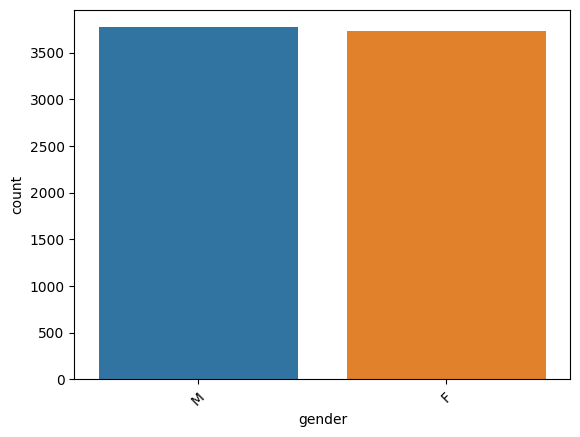

In [22]:
sns.countplot(fraud_trans, x='gender')
plt.xticks(rotation=45)
plt.show()

##### Males and Females made fraudulent transactions almost same

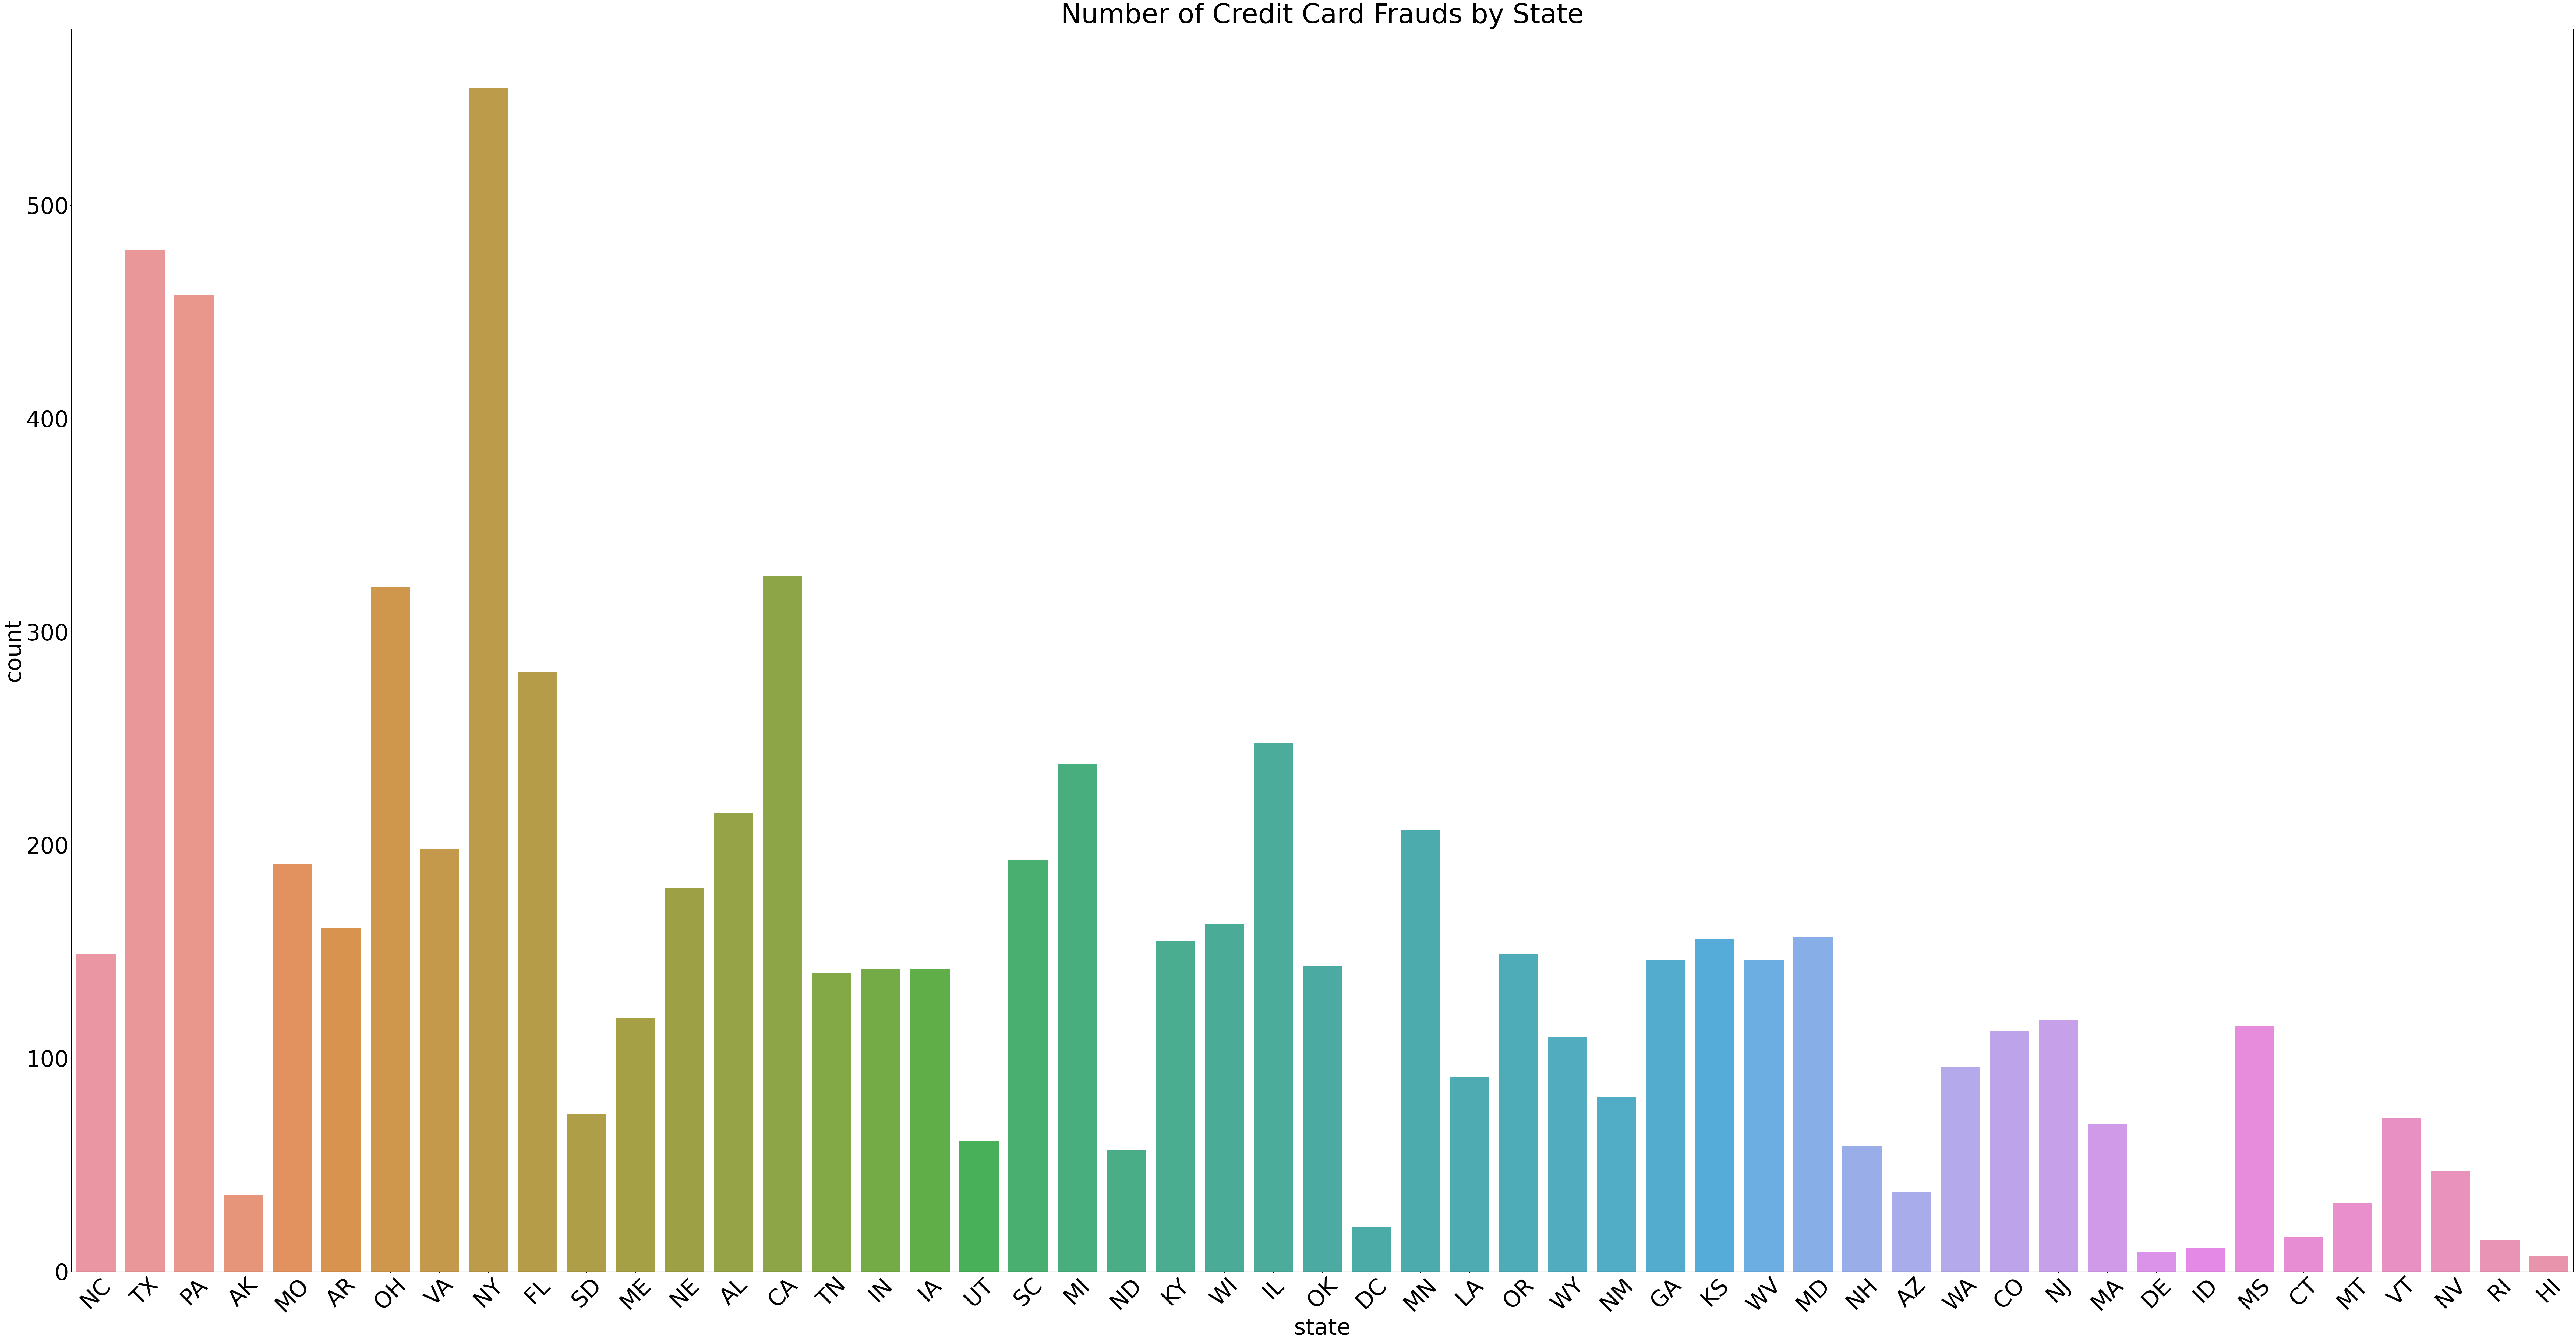

In [25]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(fraud_trans, x='state')
plt.xticks(rotation=45)
plt.title("Number of Credit Card Frauds by State")
plt.show()

##### People living in TX, PA and NY states report most of the fraudulent transactions

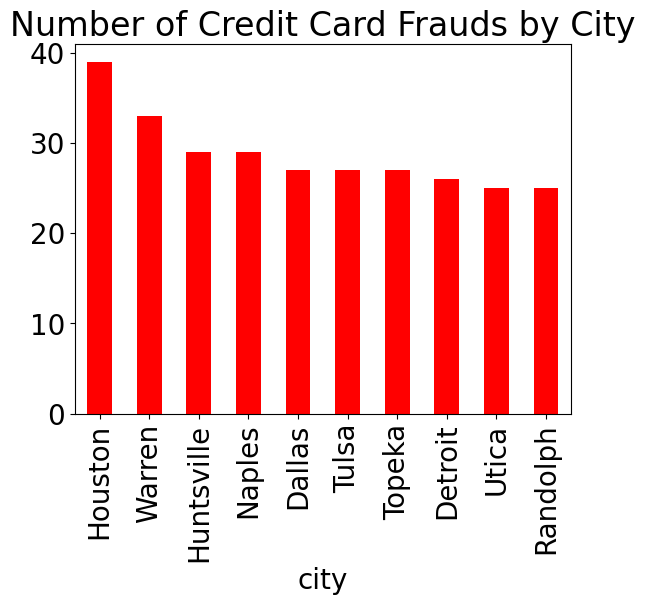

In [29]:
plt.rcParams.update({'font.size': 20})
fraud_trans["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='Red')
plt.title("Number of Credit Card Frauds by City")
plt.show()

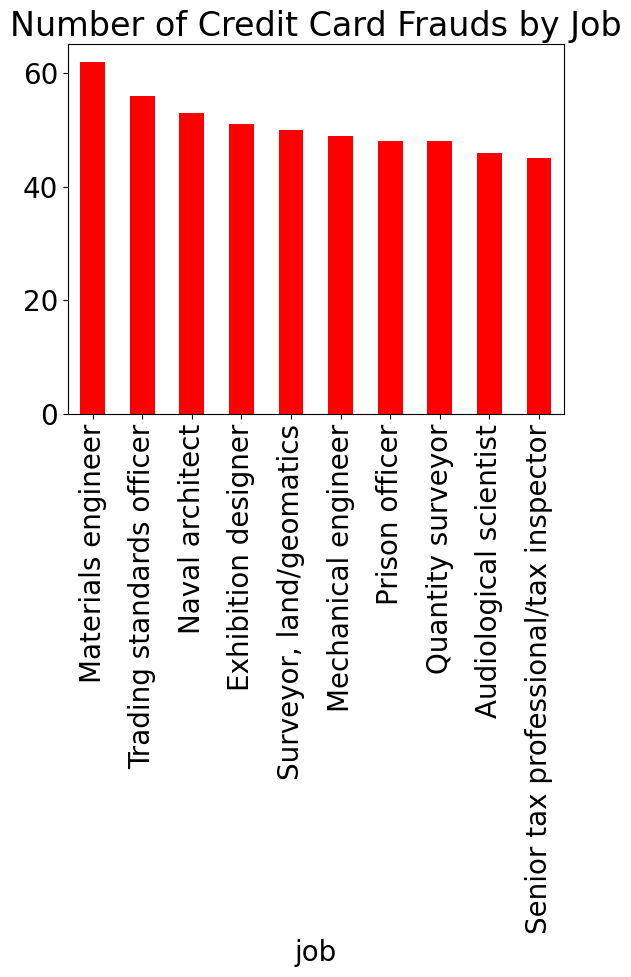

In [30]:
fraud_trans["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='Red')
plt.title("Number of Credit Card Frauds by Job")
plt.show()

In [32]:
from scipy.stats import norm, skew

/tmp/ipykernel_32/2393072202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['amt'],fit = norm,color = 'blue')


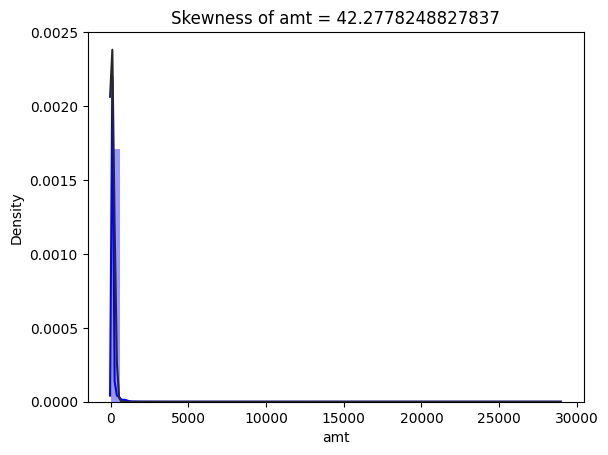

In [34]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(train['amt']))
sns.distplot(train['amt'],fit = norm,color = 'blue')
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

Inference:
Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions.

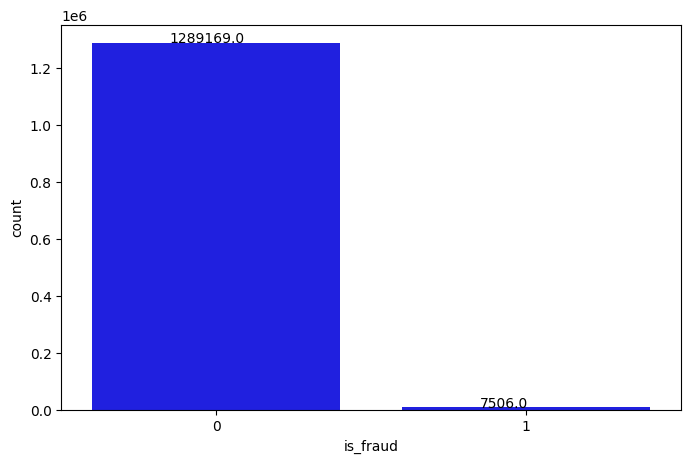

In [35]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=train,color='blue')
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [40]:
train["age"] = train["trans_date"]-train["dob"]
train['age'] = round(train['age']/pd.Timedelta('365 days'),2)
test["age"] = test["trans_date"]-test["dob"]
test['age'] = round(test['age']/pd.Timedelta('365 days'),2)
test["age"].head()

0    52.29
1    30.45
2    49.70
3    32.93
4    65.01
Name: age, dtype: float64

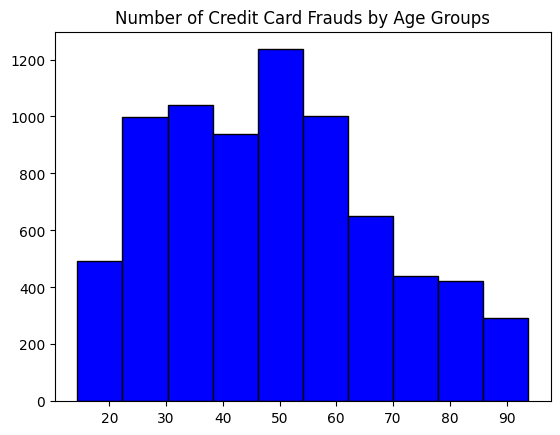

In [44]:
fraud_trans=train[train["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud_trans['age'], edgecolor = "black", bins = 10, color='blue')
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [46]:
train['trans_month'] = pd.DatetimeIndex(train['trans_date']).month
train['trans_year'] = pd.DatetimeIndex(train['trans_date']).year
test['trans_month'] = pd.DatetimeIndex(test['trans_date']).month
test['trans_year'] = pd.DatetimeIndex(test['trans_date']).year

In [53]:
import calendar
train['Month_name'] = train['trans_month'].apply(lambda x: calendar.month_abbr[x])

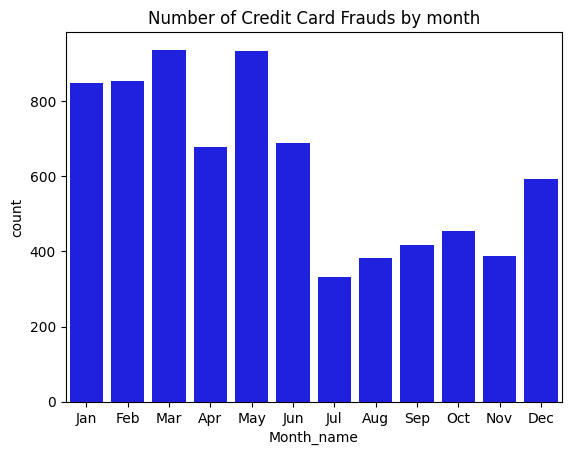

In [56]:
fraud_trans = train[train['is_fraud'] == 1]
sns.countplot(fraud_trans, x="Month_name",color='blue')
plt.title("Number of Credit Card Frauds by month")
plt.show()
del train['Month_name']

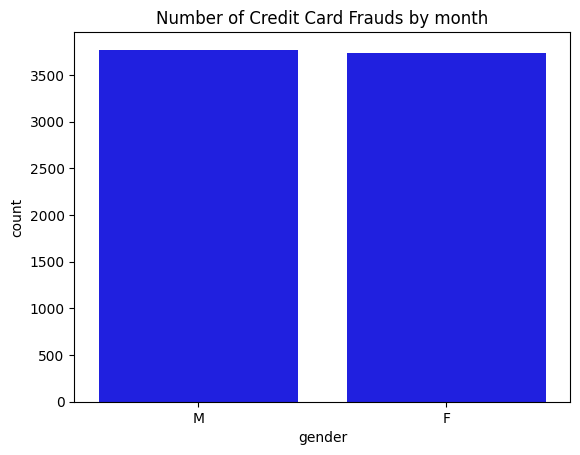

In [57]:
sns.countplot(fraud_trans, x="gender",color='blue')
plt.title("Number of Credit Card Frauds by month")
plt.show()

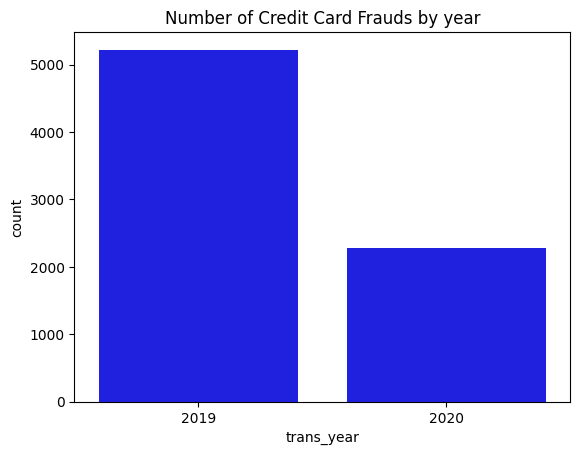

In [58]:
sns.countplot(fraud_trans, x="trans_year",color='blue')
plt.title("Number of Credit Card Frauds by year")
plt.show()

In [59]:
train['latitudinal_distance'] = abs(round(train['merch_lat']-train['lat'],3))
train['longitudinal_distance'] = abs(round(train['merch_long']-train['long'],3))
test['latitudinal_distance'] = abs(round(test['merch_lat']-test['lat'],3))
test['longitudinal_distance'] = abs(round(test['merch_long']-test['long'],3))

In [60]:
train.gender=train.gender.apply(lambda x: 1 if x=="M" else 0)
test.gender=test.gender.apply(lambda x: 1 if x=="M" else 0)

In [61]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'trans_month',
       'trans_year', 'latitudinal_distance', 'longitudinal_distance'],
      dtype='object')

In [62]:
test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'trans_month',
       'trans_year', 'latitudinal_distance', 'longitudinal_distance'],
      dtype='object')

In [63]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train=train.drop(drop_cols,axis=1)
test = test.drop(drop_cols, axis=1)

In [64]:
train = pd.get_dummies(train,columns=['category'],drop_first=True)
test = pd.get_dummies(test,columns=['category'],drop_first=True)

In [65]:
train.columns

Index(['cc_num', 'merchant', 'amt', 'first', 'last', 'gender', 'street', 'zip',
       'city_pop', 'trans_num', 'unix_time', 'is_fraud', 'age', 'trans_month',
       'trans_year', 'latitudinal_distance', 'longitudinal_distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [66]:
test.columns

Index(['cc_num', 'merchant', 'amt', 'first', 'last', 'gender', 'street', 'zip',
       'city_pop', 'trans_num', 'unix_time', 'is_fraud', 'age', 'trans_month',
       'trans_year', 'latitudinal_distance', 'longitudinal_distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [67]:
drop_cols_1 = ['cc_num', 'merchant','first', 'last','street', 'zip','trans_num', 'unix_time']
train=train.drop(drop_cols_1,axis=1)
test = test.drop(drop_cols_1, axis=1)

In [70]:
train[['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']] = train[['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']].astype(int)

In [72]:
test[['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']] = test[['category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']].astype(int)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  float64
 5   trans_month              1296675 non-null  int32  
 6   trans_year               1296675 non-null  int32  
 7   latitudinal_distance     1296675 non-null  float64
 8   longitudinal_distance    1296675 non-null  float64
 9   category_food_dining     1296675 non-null  int64  
 10  category_gas_transport   1296675 non-null  int64  
 11  category_grocery_net     1296675 non-null  int64  
 12  category_grocery_pos     1296675 non-null  int64  
 13  category_health_fitness  1296675 non-null 

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   age                      555719 non-null  float64
 5   trans_month              555719 non-null  int32  
 6   trans_year               555719 non-null  int32  
 7   latitudinal_distance     555719 non-null  float64
 8   longitudinal_distance    555719 non-null  float64
 9   category_food_dining     555719 non-null  int64  
 10  category_gas_transport   555719 non-null  int64  
 11  category_grocery_net     555719 non-null  int64  
 12  category_grocery_pos     555719 non-null  int64  
 13  category_health_fitness  555719 non-null  int64  
 14  cate

##### Modelling on Fraud Data

In [74]:
X = train.drop('is_fraud', axis=1)
y = train['is_fraud']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [76]:
X_train.columns

Index(['amt', 'gender', 'city_pop', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')